# Растровые изображения и базис Хаара
## Введение

С точки зрения линейной алгебры, пространство матриц размером M x N эквивалентно пространству векторов $R^{MN}$, то есть всегда можно "развернуть" матрицу (например, по столбцам) так, что получится вектор: 

$$
    \mathbf{a} = \mathbf{A}[:] = [
        \begin{array}{ccccccc}
            a_{0,0} & \dots & a_{M-1,0} & a_{0,1} & \dots & a_{M-1,1} & \ldots & a_{0, N-1} & \dots & a_{M-1,N-1}
        \end{array}]^T
$$

При этом скалярное произведение в пространстве $R^{MN}$ определяется как:

$$
\langle \mathbf{A}, \mathbf{B} \rangle = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} a_{m,n} b_{m, n}
$$

(рассматриваем матрицы действительных чисел, поэтому в формуле нет комплексного сопряжения).


Упрощённо, любое цифровое (*$\textit{растровое}$) изображение представляет собой матрицу, в ячейках которой хранятся цвета каждого пикселя. Если речь идет о чёрно-белых изображениях, то вместо цвета в каждую ячейку помещают значения яркости из отрезка [0, 1]. Но с дробями работать неудобно, поэтому часто значения яркости берут целыми из диапазона от 0 до 255 (при этом 0 соответствует чёрному цвету, 255 — белому). Тогда каждое значение будет занимать ровно 1 байт (8 бит). 

Зная это, можно сгенерировать простейшее цифровое изображение - шахматную доску $N\times M$. В среде Python это будет выглядеть так:

In [1]:
#стандартная преамбула в Python
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython #интерактивная оболочка python
from IPython.display import Image #возможность демонстрации изображений из файла
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# включаем черно-белую гамму
plt.gray();

<Figure size 432x288 with 0 Axes>

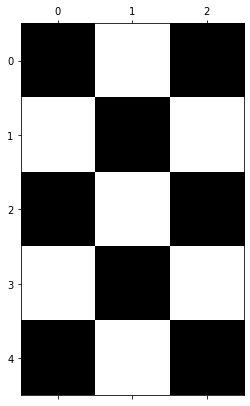

In [5]:
# создаем шахматную доску
N = 5
M = 3
img = np.zeros((N, M))
for n in range(0, N):
    for m in range(0, M):
        if (n & 0x1) ^ (m & 0x1): # '^' - XOR (исключающее ИЛИ)
            img[n, m] = 255

# выводим полученную матрицу в виде изображения
plt.matshow(img); 

## Реальные изображения

Аналогично, используя оболочку IPython, можно загрузить любое цифровое изображение и преобразовать его в матрицу (двумерный массив):

In [6]:
 # конвертируем изображение в матрицу
img = np.array(plt.imread('/content/drive/MyDrive/Colab/jet_64x64.jpg'), dtype=int)
# выводим размер матрицы
img_X = len(img[:]); # число строк
img_Y = len(img[0,:]); # число столбцов
np.shape(img)

(64, 64)

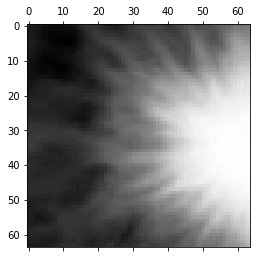

In [7]:
# выводим само изабражение
plt.matshow(img);

Изображение имеет разрешение $64\times64$ пк. Выведем значение какого-нибудь столбца - вектора $64\times1$:

In [8]:
img[:,10]

array([49, 46, 43, 40, 36, 35, 38, 43, 45, 46, 45, 41, 37, 37, 40, 42, 49,
       57, 68, 71, 69, 66, 63, 62, 60, 59, 60, 62, 67, 73, 78, 82, 80, 80,
       76, 71, 66, 65, 64, 65, 66, 67, 69, 70, 71, 70, 69, 68, 65, 61, 60,
       61, 65, 71, 77, 81, 79, 78, 76, 75, 74, 71, 69, 72])

## Канонический базис

Каноническим базисом в пространстве матриц размером $M \times N$ (пространстве векторов $R^{MN}$)  будет т.н. набор «дельта» матриц $e(N\times M)$, в которых лишь один элемент равен 1, а остальные - нули.

In [9]:
# создаем функцию, строящую "дельта"-матрицы размером NxM
def canonical(n, M, N):
    e = np.zeros((M, N))
    e[(n % M), int(n / M)] = 1
    return e

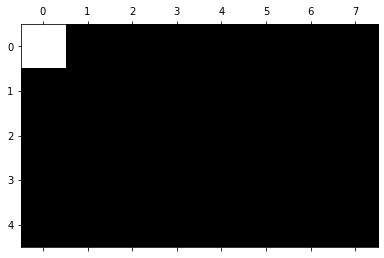

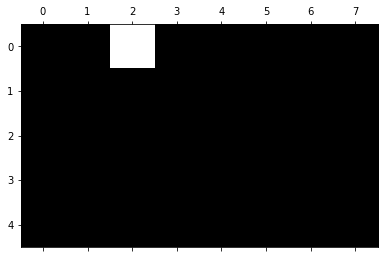

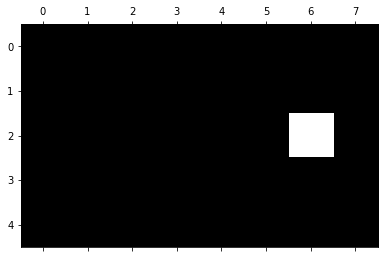

In [13]:
# зададим размер пространства 
N = 5
M = 8
# выведем несколько базисных векторов в виде изображения
plt.matshow(canonical (0,N,M))
plt.matshow(canonical (10,N,M))
plt.matshow(canonical (32,N,M))

## Хранение и передача изображений

Даже небольшие изображения требуют много памяти для хранения. Так, если информация о яркости каждого пикселя занимает 1 байт, то изображение одного кадра в формате FullHD (1920$\times$1080 пк) требует уже почти 2 мегабайта памяти. Тогда для хранения полуторачасового фильма необходимо уже более 200 гигабайт (!).

В этой связи возникает необходимость сжатия изображений. В идеале, сжатие предполагает кодирование изображений так, чтобы они занимали как можно меньший объем памяти, а во время просмотра происходило декодирование записанных в память данных, чтобы получался исходный кадр. На сегодняшний день изобретено множество алгоритмов сжатия (об этом можно судить по количеству форматов, поддерживаемых современными архиваторами: ZIP, 7Z, RAR, GZIP, BZ2 и пр.). 

К сожалению, теоретический предел сжатия данных для изображений не так уж и велик. Это происходит из-за того, что в изображениях из реального мира (например, фотографиях) значения яркости редко бывают одинаковыми даже у соседних пикселей. Эти колебания яркости могут быть незаметны человеческому глазу, но при сжатии их все равно приходится учитывать. В то же время, алгоритмы сжатия «любят», когда в данных есть закономерность. Так, последовательность из ста нулей кодируется лишь парой чисел (100,0). Однако если в середине последовательности окажется единица, для ее кодирования потребуется уже больший объем информации.

Другая проблема - восстановление данных на случай потерь в канале передачи. Допустим, нам нужно переслать наше экспериментальное изображение размером 64х64 пк. Напрямую, это эквивалентно пересылке 64х64=4096 коэффициентов разложения изображения по каноническому базису. Допустим, из-за обрыва в канале передачи удалось отправить только половину информации. Это можно смоделировать следующим образом:


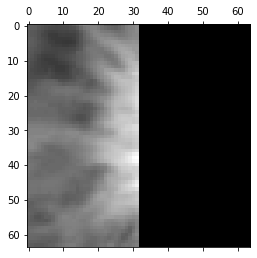

In [14]:
# преобразуем матрицу изображения в вектор по столбцам:
ar_img = np.ravel(img, order="F")
# удаляем половину данных:
ar_img[int(len(ar_img)/2):] = 0
# «пересобираем» матрицу и выводим изображение:
re_img = np.reshape(ar_img, (img_X, img_Y), order="F")
plt.matshow(re_img);

## Преобразование Хаара

Итак, стоит задача: преобразовать изображение так, чтобы оно хорошо сжималось классическими алгоритмами и было более устойчивым к потерям в канале передачи. Для этого можно использовать разложение не по каноническому базису, а по ортогональному $\textbf{базису Хаара}$.

Вспомним, что яркость соседних пикселей на «реальных» изображениях обычно отличается на небольшую величину, т.е. резкие перепады яркости встречаются редко и лишь на малой части изображения.

Рассмотрим фрагмент выведенной строки нашего изображения:

.., 69, 67, 65, 65, 64, 62, 63, 64, ..

Разобьем данную последовательность на пары и каждой паре элементов поставим в соответствие два числа - их полусумму и полуразность. Тогда на выходе получим две последовательности (68, 65, 63, 63.5) и (1.0, 0.0, 1.0, -0.5). Повторяя операцию применительно к первой последовательности, получим (66.5, 63.25) и (1.5, -0.25). Таким образом, для каждого элемента исходного сигнала на выходе мы получаем два сигнала, один из которых является огрубленной версией входного сигнала, а второй содержит детализирующую информацию, необходимую для восстановления исходного сигнала. Этот принцип - выделение информации при различных уровнях детализации - лежит в основе $\textbf{вейвлет-преобразования сигналов}$.

Не углубляясь в математику, попробуем сгенерировать $\textit{ортогональный}$ базис Хаара для квадратных матриц, число строк и столбцов в которых является степенью 2. Для этого сначала генерируем 1-мерный вектор Хаара, а затем на его основе построим базисные матрицы (размером 8х8) в виде векторного произведения всех возможных 1-мерных векторов.



In [15]:
def haar1D(n, SIZE):
    # проверяем размер вектора (должен быть степенью 2)
    if math.floor(math.log(SIZE) / math.log(2)) != math.log(SIZE) / math.log(2):
        print("invalid Haar size")
        return None
    if n >= SIZE or n < 0:
        print("invalid Haar index")
        return None
    
    # задаем нулевой базисный вектор
    if n == 0:
        return np.ones(SIZE)
    
    # для n > 1 зададаем параметр сдвига s = qk,
    # k = SIZE/2^p, p - максимально возможное, 
    # q = n - 2^p
    p = math.floor(math.log(n) / math.log(2))
    pp = int(pow(2, p))
    k = SIZE / pp
    s = (n - pp) * k
    
    h = np.zeros(SIZE)
    h[int(s):int(s+k/2)] = 1
    h[int(s+k/2):int(s+k)] = -1
    return h


def haar2D(n, SIZE):
    # задаем горизонтальные и вертикальные индексы
    hr = haar1D(n % SIZE, SIZE) # % - оператор остатка от деления целых
    hv = haar1D(int(n / SIZE), SIZE)
    # матрица Хаара - внешнее произведение двух 1D векторов Хаара
    H = np.outer(hr, hv)
    H = H / math.sqrt(np.sum(H * H))
    return H

Выведем несколько базисных матриц в пространстве $\textbf{R}^{8\times8}$ (поскольку элементы матрицы могут принимать как положительные, так и отрицательные значения, значению 0 соответствует серый цвет):


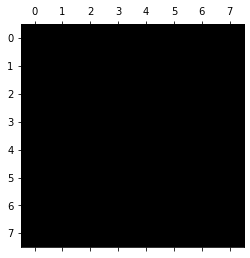

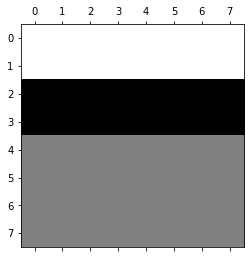

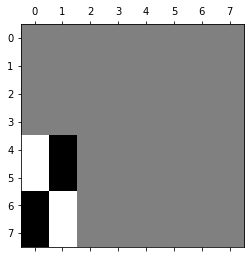

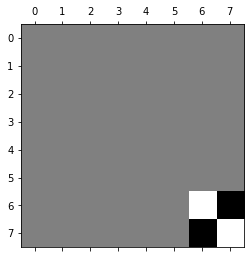

In [17]:
plt.matshow(haar2D(0,8));
plt.matshow(haar2D(2,8));
plt.matshow(haar2D(35,8));
plt.matshow(haar2D(63,8));

Можно заметить, что:

* базисные матрицы содержат как положительные, так и отрицательные значения, расположенные в симметричном порядке: значит, такой базис будет вычислять разности между различными зонами изображения
* чем больше индекс матрицы, тем эти зоны оказываются более $\textit{локализованными}$


В общем случае, матрица перехода к ортогональному базису Хаара в пространстве $\textbf{R}^{8\times8}$ выглядит примерно так:

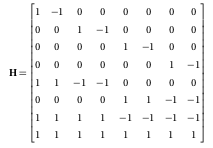

Можно проверить ортогональность базисных матриц:

In [18]:
# вычислим скалярное произведение всех базисных матриц и выведем только ненулевые результаты
for m in range(0,64):
    for n in range(0,64):
        r = np.sum(haar2D(m, 8) * haar2D(n, 8))
        if r != 0:
            print("[%dx%d -> % .2f] " % (m, n, r), end="")

[0x0 ->  1.00] [1x1 ->  1.00] [2x2 ->  1.00] [3x3 ->  1.00] [4x4 ->  1.00] [5x5 ->  1.00] [6x6 ->  1.00] [7x7 ->  1.00] [8x8 ->  1.00] [9x9 ->  1.00] [10x10 ->  1.00] [11x11 ->  1.00] [12x12 ->  1.00] [13x13 ->  1.00] [14x14 ->  1.00] [15x15 ->  1.00] [16x16 ->  1.00] [16x17 -> -0.00] [17x16 -> -0.00] [17x17 ->  1.00] [18x18 ->  1.00] [19x19 ->  1.00] [20x20 ->  1.00] [21x21 ->  1.00] [22x22 ->  1.00] [23x23 ->  1.00] [24x24 ->  1.00] [24x25 -> -0.00] [25x24 -> -0.00] [25x25 ->  1.00] [26x26 ->  1.00] [27x27 ->  1.00] [28x28 ->  1.00] [29x29 ->  1.00] [30x30 ->  1.00] [31x31 ->  1.00] [32x32 ->  1.00] [33x33 ->  1.00] [34x34 ->  1.00] [35x35 ->  1.00] [36x36 ->  1.00] [37x37 ->  1.00] [38x38 ->  1.00] [39x39 ->  1.00] [40x40 ->  1.00] [41x41 ->  1.00] [42x42 ->  1.00] [43x43 ->  1.00] [44x44 ->  1.00] [45x45 ->  1.00] [46x46 ->  1.00] [47x47 ->  1.00] [48x48 ->  1.00] [49x49 ->  1.00] [50x50 ->  1.00] [51x51 ->  1.00] [52x52 ->  1.00] [53x53 ->  1.00] [54x54 ->  1.00] [55x55 ->  1.00] 

Убедившись, что получившийся базис ортогонален, разложим наше изображение по этому базису:

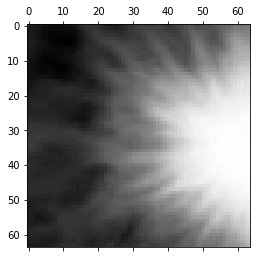

In [19]:
# спроецируем исходное изображение на базис Хаара, получим 4096 коэффициентов разложения:
haar_img = np.zeros(img_X*img_Y)
for k in range(0, (img_X*img_Y)):
    haar_img[k] = np.sum(img * haar2D(k, img_X))

# затем восстановим (синтезируем) исходное изображение:
re_img = np.zeros((img_X,img_Y))
for k in range(0, (img_X*img_Y)):
    re_img += haar_img[k] * haar2D(k, img_X)

plt.matshow(re_img);

Теперь представим опять, что половина коэффициентов разложения была утрачена в канале передачи, и попробуем снова восстановить исходное изображение:

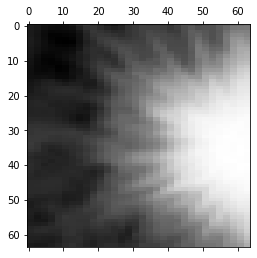

In [20]:
new_img = np.copy(haar_img);
new_img[int(len(new_img)/2):] = 0

# "пересобираем" матрицу
re_img = np.zeros((img_X,img_Y))
for k in range(0, (img_X*img_Y)):
    re_img += new_img[k] * haar2D(k, img_X)

plt.matshow(re_img);

В данном случае мы сохранили первую половину коэффициентов разложения, соответствующих полусумме значений яркости. Если представить, что сохранилась только вторая половина коэффициентов, результат восстановления будет уже другой:

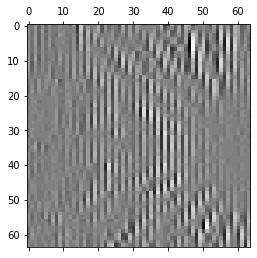

In [21]:
new_img = np.copy(haar_img);
new_img[0:int(len(new_img)/2)] = 0

# "пересобираем" матрицу
re_img = np.zeros((img_X,img_Y))
for k in range(0, (img_X*img_Y)):
    re_img += new_img[k] * haar2D(k, img_X)

plt.matshow(re_img);

Таким образом, преобразование Хаара можно считать неким фильтром, разделяющим сигнал на низкочастотную и высокочастотную составляющие. Так, полусуммы элементов изображения усредняют значения яркостей, то есть «отфильтровывают» случайные всплески значений. Аналогично, разности «выделяют» среди значений межпиксельные «всплески», т.е. «отфильтровывают» низкие частоты. Если наше изображение - фотография человека, то низкочастотная составляющая несёт в себе информацию об общей форме лица, о плавных перепадах яркости, а высокочастотная — это шум и мелкие детали. Чтобы получить исходное изображение (сигнал), нужно просто снова объединить обе составляющие.

Преобразование Хаара лежит в основе поэтапного кодирования - сначала отправляются элементы, несущие приближенную информацию с низким разрешением (низкочастотная составляющая), а затем, если канал передачи позволяет, добавляется детализирующая информация (высокочастотная составляющая). Это можно наблюдать, например, в процессе открытия интернет-страниц при низкой скорости сети.

Очевидно, что преобразование Хаара будет давать наилучший результат, когда мы получим много нулей, то есть, когда изображение содержит длинные участки одинаковых значений яркости. Это может быть, например, рентгеновский снимок, отсканированный документ.

Говорят, что преобразование Хаара устраняет т.н. константную составляющую (момент нулевого порядка), то есть переводит константы в нули. Для устранения моментов более высокого порядка имеются усовершенствованные вейвлет-преобразования (например, преобразование Добеши).


Подробнее про вейвлет Хаара и вейвлет-преобразования можно найти в литературе: 

1) Яковлев А.Н. Введение в вейвлет-преобразования: Учеб. пособие. – Новосибирск: Изд-во НГТУ, 2003.

2) Уэлстид С. Фракталы и вейвлеты для сжатия изображений в действии. — М.: Триумф, 2003.